## A first neural network in Keras

### First step is to load data from file and plot a few examples

In [11]:
% matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [12]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:20000]
train_y_short = train_y[:20000]

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)


In [47]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

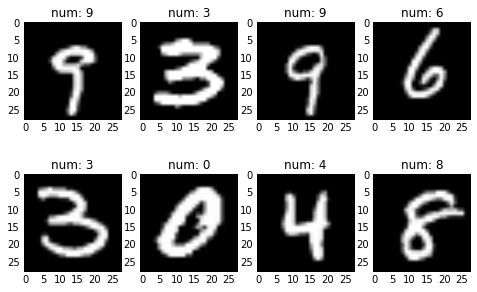

In [48]:
plotExamples(train_x, train_y)

### Building a first Keras model
- Simple 3 layer feedforward network
- Three steps: 
    - Build model
    - Compile model setting the optimizer and loss 
        - Note models can be recompiled without affecting the stored value of weights and biases. This means that if you want to change your learning rate or optimizer during training, you simply recompile and call model.fit again
    - Train the model by calling model.fit

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using Theano backend.


In [16]:
model = Sequential()
model.add(Dense(100, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2)

Epoch 1/10
0s - loss: 0.1112 - acc: 0.2610
Epoch 2/10
0s - loss: 0.0790 - acc: 0.4303
Epoch 3/10
0s - loss: 0.0719 - acc: 0.5210
Epoch 4/10
1s - loss: 0.0666 - acc: 0.5779
Epoch 5/10
0s - loss: 0.0620 - acc: 0.6288
Epoch 6/10
1s - loss: 0.0584 - acc: 0.6710
Epoch 7/10
1s - loss: 0.0553 - acc: 0.7079
Epoch 8/10
0s - loss: 0.0525 - acc: 0.7358
Epoch 9/10
0s - loss: 0.0499 - acc: 0.7600
Epoch 10/10
0s - loss: 0.0478 - acc: 0.7768


In [17]:
# Print model information
model.summary()
print()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           78500       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1010        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 79510
_______________________________________________________________________

### Example of recompiling a model

In [18]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.01)
print("Learning rate is 0.1")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
print()
print("Learning rate is 0.01")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)
print()
print("Learning rate is 0.001")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=64, nb_epoch=10, verbose=2, validation_split=0.2)

Learning rate is 0.1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
0s - loss: 0.1403 - acc: 0.2061 - val_loss: 0.0961 - val_acc: 0.2635
Epoch 2/10
0s - loss: 0.0881 - acc: 0.3120 - val_loss: 0.0847 - val_acc: 0.3420
Epoch 3/10
0s - loss: 0.0811 - acc: 0.3879 - val_loss: 0.0799 - val_acc: 0.4025
Epoch 4/10
0s - loss: 0.0771 - acc: 0.4565 - val_loss: 0.0764 - val_acc: 0.4698
Epoch 5/10
0s - loss: 0.0739 - acc: 0.5101 - val_loss: 0.0735 - val_acc: 0.5122
Epoch 6/10
0s - loss: 0.0709 - acc: 0.5534 - val_loss: 0.0707 - val_acc: 0.5473
Epoch 7/10
0s - loss: 0.0682 - acc: 0.5882 - val_loss: 0.0682 - val_acc: 0.5760
Epoch 8/10
0s - loss: 0.0656 - acc: 0.6176 - val_loss: 0.0658 - val_acc: 0.6078
Epoch 9/10
0s - loss: 0.0633 - acc: 0.6426 - val_loss: 0.0637 - val_acc: 0.6315
Epoch 10/10
0s - loss: 0.0611 - acc: 0.6694 - val_loss: 0.0618 - val_acc: 0.6492

Learning rate is 0.01
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
0s - loss: 0.0592 - acc: 0.6887 - val_loss: 0.

### Helper function to calculate model accuracy on the test data

In [19]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [20]:
accuracy(test_x, test_y, model)

Accuracy on data is: 81.25%


### Plotting some examples the model got right and wrong

In [40]:
result = model.predict(test_x)
correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
test_x_correct = test_x[correct_indices]
test_y_correct = test_y[correct_indices]
incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
test_x_incorrect = test_x[incorrect_indices]
test_y_incorrect = test_y[incorrect_indices]

(8125, 784)


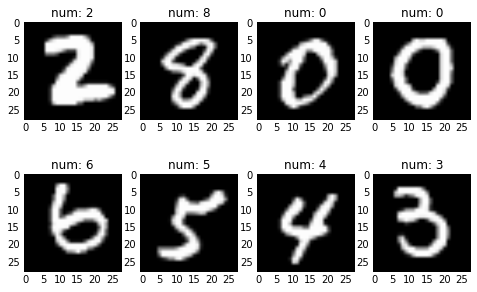

In [41]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(1875, 784)


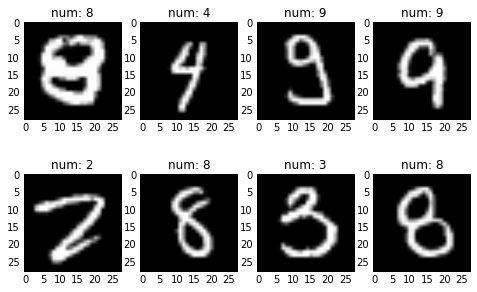

In [46]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)